# WASTEWATER TREATMENT PLANTS - SENTINELEGXOS -- SWIM WATER EVALUATION TOOL
# Combined Wastewater Treatment Plants Water Quality Analysis
# Sentinel-2 Water Quality (Se2WAQ) Monitoring

### STEP 1: REQUEST BUILDER -- BUILD THE API 

Request Builder is an online graphical interface to the Sentinel Hub API-s. This tool makes it easier to create and debug API requests, and supports the export of the resulting code in various programming languages. In this tutorial, we will create a Process API request for downloading raster images of the burnt area from the location of the wildfire in Greece that we have already examined in the Browser. Just like a Process API request in code, a request created with the Requests Builder consists of 5 main parts:

    Data Collection
    Time Range
    Area of Interest
    Output
    Evalscript

Screenshot of Requests Builder for the ΑΙΤΩΛΙΚΟ are in AITOLOAKARNANIA GREECE

These can be set individually in the interface. Use the following settings for the Alexandropouli Wildfire example here:

    Data Collection: sentinel-2 l2a
    Time Range: From 2025-09-23 to 2025-09-23
    Area of Interest: [
  21.336075198,
  38.445840322,
  21.392800692,
  38.399042588
]

Click Parse to parse the area of interest - it should be displayed in the map window and zoom in to the rectangle of interest.

    Evalscript: use the evalscript from the previous Copernicus Browser example:



/*
Name:    Sentinel-2 Water Quality (Se2WaQ) 
Version: 1.0
Date:    2020-01-31

Author:      Nuno Sidónio Andrade Pereira
Affiliation: Polytechnic Institute of Beja, Portugal
License:     Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)

Refs.: [1]M. Potes et al., “Use of Sentinel 2 – MSI for water quality 
          monitoring at Alqueva reservoir, Portugal,” Proc. Int. Assoc. 
          Hydrol. Sci., vol. 380, pp. 73–79, Dec. 2018.

       [2]K. Toming, T. Kutser, A. Laas, M. Sepp, B. Paavel, and T. Nõges,
          “First Experiences in Mapping Lake Water Quality Parameters with
          Sentinel-2 MSI Imagery,” Remote Sens., vol. 8, no. 8, p. 640, 
          Aug. 2016.
*/

// user defined FLAGs

var FLAGparam = 5;
var FLAGbackGround = 2;

// Water-land contrast index (to define the background)

var NDWI = index(B03, B08); 

// Background indexes                           

var Black = [0];                                       // FLAGbackGround = 0

var NDVI = index(B08, B04);                            // FLAGbackGround = 1

var TrueColor = [B04*2.5, B03*2.5, B02*2.5];           // FLAGbackGround = 2


// Empirical models

var Chl_a = 4.26 * Math.pow(B03/B01, 3.94);            // FLAGparam = 0; S2-L2A; [1] Unit: mg/m3;        

var Cya = 115530.31 * Math.pow(B03 * B04 / B02, 2.38); // FLAGparam = 1; S2-L2A; [1] Unit: 10^3 cell/ml; 

var Turb = 8.93 * (B03/B01) - 6.39;                    // FLAGparam = 2; S2-L2A; [1] Unit: NTU;          

var CDOM = 537 * Math.exp(-2.93*B03/B04);              // FLAGparam = 3; S2-L1C; [2] Unit: mg/l;         

var DOC = 432 * Math.exp(-2.24*B03/B04);               // FLAGparam = 4; S2-L1C; [2] Unit: mg/l;         

var Color = 25366 * Math.exp(-4.53*B03/B04);           // FLAGparam = 5; S2-L1C; [2] Unit: mg.Pt/l;      


// Numerical values for the scales of parameters

var scaleChl_a = [0, 6, 12, 20, 30, 50];
var scaleCya   = [0, 10, 20, 40, 50, 100];
var scaleTurb  = [0, 4, 8, 12, 16, 20];
var scaleCDOM  = [0, 1, 2, 3, 4, 5];
var scaleDOC   = [0, 5, 10, 20, 30, 40];
var scaleColor = [0, 10, 20, 30, 40, 50];

// Colors for the scales

var s = 255;
var colorScale = 
  [
   [73/s, 111/s, 242/s],
   [130/s, 211/s, 95/s],
   [254/s, 253/s, 5/s],
   [253/s, 0/s, 4/s],
   [142/s, 32/s, 38/s],
   [217/s, 124/s, 245/s]
  ];

// Image generation

if (NDWI<0) {
  if ( FLAGbackGround == 0 ) {
    return Black;
  } else if ( FLAGbackGround == 1 ) {
    return [0, .5*(NDVI+1), 0];
  } else if ( FLAGbackGround == 2 ) {
    return TrueColor;
  }
} else {
  switch ( FLAGparam ) {
    case 0:
     return colorBlend(Chl_a, scaleChl_a, colorScale);
     break;
    case 1:
      return colorBlend(Cya, scaleCya, colorScale);
      break;
    case 2:
      return colorBlend(Turb, scaleTurb, colorScale);
      break;
    case 3:
      return colorBlend(CDOM, scaleCDOM, colorScale);
      break;
    case 4:
      return colorBlend(DOC, scaleDOC, colorScale);
      break;
    case 5:
      return colorBlend(Color, scaleColor, colorScale);
      break;
    default:
      return TrueColor;
  }
}




Finally, you must set the language of the Request Preview to python-requests in the dropdown menu. This will create request code you can later use in the Jupyter Notebook as well.

If you now click on Send request, you will be prompted to save the request and download the response. The response is a .tar file containing default.tif and burnMask.tif. To download raster datasets of the burnt area for a time series, you only need to change the Time Range parameter and repeat running the request. Possible dates can be the following:

    03.08.2023 - 04.08.2023
    23.08.2023 - 24.08.2023
    28.08.2023 - 29.08.2023
    02.09.2023 - 03.08.2023
    12.08.2023 - 13.08.2023

The result is a series of TIFF files,       which you can process locally in GIS software to calculate quantitative results. But more importantly, you can copy the code from the Request Preview window and use it in a Jupyter Notebook of the same test case.
Step 3: Jupyter notebooks
Importing necessary libraries

To run this example, you do not need any additional GIS-specific libraries. You can of course improve the workflow with additional libraries, but for someone new to earth observation coding, this basic notebook could be a good place to start.

## 


This notebook combines:

    Loading all wastewater treatment plants in Greece
    Looping through all plants and timeslots
    Generating Se2WAQ visualization images
    Calculating 6 water quality metrics with threshold analysis
    Computing polluted areas for each metric

Metrics analyzed:

    Chl_a: Chlorophyll-a (Eutrophication) - mg/m³
    Cya: Cyanobacteria - 10³ cells/ml
    Turb: Turbidity - NTU
    CDOM: Chromophoric Dissolved Organic Matter - mg/l
    DOC: Dissolved Organic Carbon - mg/l
    Color: Water Color - mg.Pt/l

1. Import Required Libraries Configure Sentinel Hub Credentials
 AUTOMATE THE RETRIEVAL WITH PYTHON

In [1]:
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session
from sentinelhub import SHConfig
import matplotlib.pyplot as plt
import numpy as np
import tarfile
import getpass


C:\Users\mike\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



# 2. Configure Sentinel Hub Credentials

### Credentials

You can obtain credentials for the Sentinel Hub services (`client_id` & `client_secret`) by navigating to your [Dashboard](https://shapps.dataspace.copernicus.eu/dashboard/#/). In the User Settings, you can create a new OAuth Client to generate these credentials. More detailed instructions can be found on the  corresponding [documentation page](https://documentation.dataspace.copernicus.eu/APIs/SentinelHub/Overview/Authentication.html).

Once you run the next cell, you will be prompted to enter the `client_id` and `client_secret`.

In [2]:
# Import libraries
import json
import geopandas as gpd
from shapely.geometry import box
import rasterio  # Keep rasterio for TIFF handling
DATA_DIR = "data"
VISUALIZATION_DIR = "visualizations"

In [3]:
# Your client credentials

config = SHConfig()
config.sh_client_id = getpass.getpass("Enter your SentinelHub ID")
config.sh_client_secret = getpass.getpass("Enter your SentinelHub client secret")
config.sh_token_url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"
config.sh_base_url = "https://sh.dataspace.copernicus.eu"
#config.save("cdse")

If you have the credentials, you will need a session token to make requests. This token is generated in the following function.

In [4]:
def getauth_token():
    # Create a session
    client = BackendApplicationClient(client_id=config.sh_client_id)
    oauth = OAuth2Session(client=client)
    # Get token for the session
    token = oauth.fetch_token(
        token_url="https://identity.cloudferro.com/auth/realms/CDSE/protocol/openid-connect/token",
        client_id=config.sh_client_id,
        client_secret=config.sh_client_secret,
    )
    # All requests using this session will have an access token automatically added
    print ("oauth=",oauth)
    return oauth
   

Now, we are ready to make the request for each of the previously defined time slots. We first get the token created with the OAuth client before making the request and loop through the request for all time slots. This cell might take 10-20 seconds as this is where the requests are actually performed. If it runs successfully, we should see that the compressed .tar files are created in the local folder. 

In [5]:
# Check if credentials are loaded
print("Client ID exists:", bool(config.sh_client_id))
print("Client ID length:", len(config.sh_client_id) if config.sh_client_id else 0)
print("Client secret exists:", bool(config.sh_client_secret))
print("Client secret length:", len(config.sh_client_secret) if config.sh_client_secret else 0)

Client ID exists: True
Client ID length: 39
Client secret exists: True
Client secret length: 32


# 3. Load Wastewater Treatment Plants

In [6]:
import json
from pyproj import CRS, Transformer
from shapely.geometry import box
from shapely.ops import transform


# Load wastewater treatment plants from JSON
with open('wastewatertreatmentplants.json', 'r', encoding='utf-8') as f:
    wastewater_plants = json.load(f)

# Define coordinate reference systems
WGS84_CRS = CRS("EPSG:4326")        # Standard GPS coordinates
GREEK_GRID_CRS = CRS("EPSG:2100")   # Greek Grid for accurate meters

# Create transformers
transformer_to_greek_grid = Transformer.from_crs(WGS84_CRS, GREEK_GRID_CRS, always_xy=True).transform
transformer_to_wgs84 = Transformer.from_crs(GREEK_GRID_CRS, WGS84_CRS, always_xy=True).transform

def create_square_around_point(lon, lat, size_km=4):
    """Create a 4 km square bounding box around a point"""
    # Convert to Greek Grid
    x, y = transformer_to_greek_grid(lon, lat)
    
    # Calculate square bounds (4km = 4000m, half on each side = 2000m)
    half_size = size_km * 500  # 4 * 500 = 2000m
    square = box(x - half_size, y - half_size, x + half_size, y + half_size)
    
    # Convert back to WGS84
    square_wgs84 = transform(transformer_to_wgs84, square)
    return square_wgs84

# Process each plant
plant_squares = []
for plant in wastewater_plants:
    lon = plant['longitude']
    lat = plant['latitude']
    name = plant['name']
    square = create_square_around_point(lon, lat)
    plant_squares.append((name, square))

print(f"✓ Loaded {len(plant_squares)} wastewater treatment plants")

✓ Loaded 279 wastewater treatment plants


# 4. Define Time Slots

## Defining time slots 

Using the [Requests Builder](https://shapps.dataspace.copernicus.eu/requests-builder/) and the Browser, we can see all the images acquisitions that match our criteria. In the following cell, we enter these time slots to create a time series and understand the extent of the damage caused.

In [7]:
slots = [
    ("2022-08-01", "2022-08-07"),
    ("2023-08-01", "2023-08-07"),
    ("2024-08-01", "2024-08-07"),
    ("2025-08-01", "2025-08-07"),
]

time_slots = slots

print("Time Slots:\n")
for slot in slots:
    print(slot[0])

    

Time Slots:

2022-08-01
2023-08-01
2024-08-01
2025-08-01


time_slots = [
    ("2022-04-01", "2022-04-07"),
    ("2022-06-01", "2022-06-07"),
    ("2022-07-01", "2022-07-07"),
    ("2022-08-01", "2022-08-07"),
    ("2022-10-01", "2022-10-07"),
    ("2022-12-01", "2022-12-07"),
    ("2023-04-01", "2023-04-07"),
    ("2023-06-01", "2023-06-07"),
    ("2023-07-01", "2023-07-07"),
    ("2023-08-01", "2023-08-07"),
    ("2023-10-01", "2023-10-07"),
    ("2023-12-01", "2023-12-07"),
    ("2024-04-01", "2024-04-07"),
    ("2024-06-01", "2024-06-07"),
    ("2024-07-01", "2024-07-07"),
    ("2024-08-01", "2024-08-07"),
    ("2024-10-01", "2024-10-07"),
    ("2024-12-01", "2024-12-07")
]

print(f"✓ Defined {len(time_slots)} time slots")
print(f"✓ Total images to process: {len(plant_squares) * len(time_slots)}")


# 5. Define Water Quality Thresholds


In [8]:
# Define thresholds for each pollutant
thresholds = {
    "Chl_a": 6,      # Eutrophication threshold (mg/m³)
    "Cya": 10,       # Cyanobacteria threshold (10³ cells/ml)
    "Turb": 4,       # Turbidity threshold (NTU)
    "CDOM": 1,       # Chromophoric Dissolved Organic Matter threshold (mg/l)
    "DOC": 5,        # Dissolved Organic Carbon threshold (mg/l)
    "Color": 10      # Color threshold (mg.Pt/l)
}

print("✓ Water quality thresholds defined:")
for pollutant, threshold in thresholds.items():
    print(f"  - {pollutant}: {threshold}")

✓ Water quality thresholds defined:
  - Chl_a: 6
  - Cya: 10
  - Turb: 4
  - CDOM: 1
  - DOC: 5
  - Color: 10



# 6. Define Evalscripts

We need two evalscripts:

    Visualization script: Returns RGB image with color-coded water quality
    Data script: Returns raw band data for metric calculations
Next, we can enter the evalscript for wastewater map that we used earlier in the Browser and Requests Builder - feel free to copy it from the Browser window.


def generate_evalscript(FLAGparam, FLAGbackGround):
    #  ATTENTION: All literal JavaScript curly braces { } must be escaped 
    #  with double braces {{ }}
    #  except for the Python variables to be interpolated: 
    #  {FLAGparam} and {FLAGbackGround}.
    #  DO NOT LEAVE ANY NEWLINES !!!!!!!!!!!!!!!SOS !!!!!!!!!!!!!!!!!!!!
    #  THE REQUEST WILL FAIL
    #//VERSION=3
    #Name:    Sentinel-2 Water Quality (Se2WaQ) 
    #Version: 1.0
    #Date:    2020-01-31
    
    #Author:      Nuno Sidónio Andrade Pereira
    #Affiliation: Polytechnic Institute of Beja, Portugal
    #License:     Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)
    
    #Refs.: [1]M. Potes et al., “Use of Sentinel 2 – MSI for water quality 
    #          monitoring at Alqueva reservoir, Portugal,” Proc. Int. Assoc. 
    #          Hydrol. Sci., vol. 380, pp. 73–79, Dec. 2018.
    #
    #       [2]K. Toming, T. Kutser, A. Laas, M. Sepp, B. Paavel, and T. Nõges,
    #          “First Experiences in Mapping Lake Water Quality Parameters with
    #          Sentinel-2 MSI Imagery,” Remote Sens., vol. 8, no. 8, p. 640, 
    #          Aug. 2016.
    #
    #          The script performs three main tasks:
    #    1. Water/Land Detection: It uses the NDWI (Normalized Difference Water Index) to distinguish between water bodies (NDWI>0) and land/other features (NDWI<0).
    #    2. Background Rendering (Land Area): For land areas (NDWI<0), it renders the selected background view:
    #        ◦ FLAGbackGround = 0: Black.
    #        ◦ FLAGbackGround = 1: NDVI (Normalized Difference Vegetation Index) - shows vegetation health.
    #        ◦ FLAGbackGround = 2: True Color (simulated natural view).
    #        ◦ Note: In your provided code, FLAGbackGround is set to 2, so land areas will be rendered in True Color.
    #    3. Water Quality Visualization (Water Area): For water areas (NDWI>0), it calculates the chosen water quality parameter based on FLAGparam and renders the result using a pre-defined color scale:
    #        ◦ It uses a switch statement to select the appropriate empirical model (Chl_a, Cya, Turb, CDOM, DOC, or Color).
    #        ◦ It uses the colorBlend function to assign a color from the colorScale (a gradient from blue to magenta) based on where the calculated value falls within the numerical range defined by the corresponding scale array (e.g., scaleColor for Color).
    #        ◦ Note: In your provided code, FLAGparam is set to 5, so the script is configured to calculate and display Water Color.
    #  The output is 
    #   A. a single image where water bodies are color-coded by the concentration of the selected water quality parameter, 
    #      and land is rendered in the chosen background style.
    #    B
    #*/
   
    evalscript_template = f"""
//VERSION=3
function setup() {{
    return {{
        input: ["B01", "B02", "B03", "B04", "B08"],
        output: 
            {{ id: "default", bands: 3 }},
      		{{ id: "polluteMask", bands: 6, sampleType: "FLOAT32" }}
    }};
}}
function evaluatePixel(samples) {{
    //// User-defined FLAGs - Python variables are interpolated here
    var FLAGparam = {FLAGparam};
    var FLAGbackGround = {FLAGbackGround};
    //// Water-land contrast index (NDWI)
    var NDWI = index(samples.B03, samples.B08);
    //// Background indexes
    var Black = [0, 0, 0];
    var NDVI = index(samples.B08, samples.B04);
    var TrueColor = [samples.B04 * 2.5, samples.B03 * 2.5, samples.B02 * 2.5];
    //// Empirical models
    var Chl_a = 4.26 * Math.pow(samples.B03 / samples.B01, 3.94);
    var Cya = 115530.31 * Math.pow(samples.B03 * samples.B04 / samples.B02, 2.38);
    var Turb = 8.93 * (samples.B03 / samples.B01) - 6.39;
    var CDOM = 537 * Math.exp(-2.93 * samples.B03 / samples.B04);
    var DOC = 432 * Math.exp(-2.24 * samples.B03 / samples.B04);
    var Color = 25366 * Math.exp(-4.53 * samples.B03 / samples.B04);
    //// Numerical values for the scales of parameters
    var scaleChl_a = [0, 6, 12, 20, 30, 50];
    var scaleCya = [0, 10, 20, 40, 50, 100];
    var scaleTurb = [0, 4, 8, 12, 16, 20];
    var scaleCDOM = [0, 1, 2, 3, 4, 5];
    var scaleDOC = [0, 5, 10, 20, 30, 40];
    var scaleColor = [0, 10, 20, 30, 40, 50];
    //// Colors for the scales
    var s = 255;
    var colorScale = [
        [73 / s, 111 / s, 242 / s],
        [130 / s, 211 / s, 95 / s],
        [254 / s, 253 / s, 5 / s],
        [253 / s, 0 / s, 4 / s],
        [142 / s, 32 / s, 38 / s],
        [217 / s, 124 / s, 245 / s]
    ];
    //// Image generation
    if (NDWI < 0) {{
        if (FLAGbackGround == 0) {{
            return {{
                default:Black,
    			polluteMask:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
            }};            
        }} else if (FLAGbackGround == 1) {{
            return {{
                default:[0, 0.5 * (NDVI + 1), 0],
    			polluteMask:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
            }};
        }} else if (FLAGbackGround == 2) {{
            return {{
                default:TrueColor,
        		polluteMask:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
            }}
        }}
    }} else {{ //// Return pollutant values as separate bands
        switch (FLAGparam) {{
            case 0:
                return {{
                        default:colorBlend(Chl_a, scaleChl_a, colorScale),
                        polluteMask:[Chl_a, Cya, Turb, CDOM, DOC, Color]
                }};
            case 1:
                return {{
                        default:colorBlend(Cya, scaleCya, colorScale),
                        polluteMask:[Chl_a, Cya, Turb, CDOM, DOC, Color]
                }};
            case 2:
                return {{
                        default:colorBlend(Turb, scaleTurb, colorScale),
                        polluteMask:[Chl_a, Cya, Turb, CDOM, DOC, Color]
                }};
            case 3:
                return {{
                        default:colorBlend(CDOM, scaleCDOM, colorScale),
                        polluteMask:[Chl_a, Cya, Turb, CDOM, DOC, Color]
                }};
            case 4:
                return {{
                        default:colorBlend(DOC, scaleDOC, colorScale),
                        polluteMask:[Chl_a, Cya, Turb, CDOM, DOC, Color]
                }};
            case 5:
                return {{
                        default:colorBlend(Color, scaleColor, colorScale),
                        polluteMask:[Chl_a, Cya, Turb, CDOM, DOC, Color]
                }};
            default:
                return {{
                        default:TrueColor,
                        polluteMask:[Chl_a, Cya, Turb, CDOM, DOC, Color]
                }};
        }}
    }}
}}
"""
    return evalscript_template

# Example usage
evalscript = generate_evalscript(5, 2)
print(evalscript)  # Verify the generated evalscript


###############################################
# tinned food.....

# Evalscript for Se2WAQ Visualization (Color parameter)
evalscript_visualization = """
//VERSION=3
function setup() {
    return {
        input: ["B01", "B02", "B03", "B04", "B08"],
        output: { bands: 3 }
    };
}
function evaluatePixel(samples) {
    var FLAGparam = 5;  // Color parameter
    var FLAGbackGround = 2;  // True color background
    
    var NDWI = index(samples.B03, samples.B08);
    var Black = [0, 0, 0];
    var NDVI = index(samples.B08, samples.B04);
    var TrueColor = [samples.B04 * 2.5, samples.B03 * 2.5, samples.B02 * 2.5];
    
    // Empirical models
    var Chl_a = 4.26 * Math.pow(samples.B03 / samples.B01, 3.94);
    var Cya = 115530.31 * Math.pow(samples.B03 * samples.B04 / samples.B02, 2.38);
    var Turb = 8.93 * (samples.B03 / samples.B01) - 6.39;
    var CDOM = 537 * Math.exp(-2.93 * samples.B03 / samples.B04);
    var DOC = 432 * Math.exp(-2.24 * samples.B03 / samples.B04);
    var Color = 25366 * Math.exp(-4.53 * samples.B03 / samples.B04);
    
    // Scales
    var scaleChl_a = [0, 6, 12, 20, 30, 50];
    var scaleCya = [0, 10, 20, 40, 50, 100];
    var scaleTurb = [0, 4, 8, 12, 16, 20];
    var scaleCDOM = [0, 1, 2, 3, 4, 5];
    var scaleDOC = [0, 5, 10, 20, 30, 40];
    var scaleColor = [0, 10, 20, 30, 40, 50];
    
    var s = 255;
    var colorScale = [
        [73/s, 111/s, 242/s],
        [130/s, 211/s, 95/s],
        [254/s, 253/s, 5/s],
        [253/s, 0/s, 4/s],
        [142/s, 32/s, 38/s],
        [217/s, 124/s, 245/s]
    ];
    
    if (NDWI < 0) {
        if (FLAGbackGround == 0) return Black;
        else if (FLAGbackGround == 1) return [0, 0.5 * (NDVI + 1), 0];
        else if (FLAGbackGround == 2) return TrueColor;
    } else {
        switch (FLAGparam) {
            case 0: return colorBlend(Chl_a, scaleChl_a, colorScale);
            case 1: return colorBlend(Cya, scaleCya, colorScale);
            case 2: return colorBlend(Turb, scaleTurb, colorScale);
            case 3: return colorBlend(CDOM, scaleCDOM, colorScale);
            case 4: return colorBlend(DOC, scaleDOC, colorScale);
            case 5: return colorBlend(Color, scaleColor, colorScale);
            default: return TrueColor;
        }
    }
}
"""

# Evalscript for raw data extraction (6 bands for 6 metrics)
evalscript_data = """
//VERSION=3
function setup() {
    return {
        input: ["B01", "B02", "B03", "B04", "B08"],
        output: { bands: 6, sampleType: "FLOAT32" }
    };
}
function evaluatePixel(samples) {
    // Calculate all 6 water quality metrics
    var Chl_a = 4.26 * Math.pow(samples.B03 / samples.B01, 3.94);
    var Cya = 115530.31 * Math.pow(samples.B03 * samples.B04 / samples.B02, 2.38);
    var Turb = 8.93 * (samples.B03 / samples.B01) - 6.39;
    var CDOM = 537 * Math.exp(-2.93 * samples.B03 / samples.B04);
    var DOC = 432 * Math.exp(-2.24 * samples.B03 / samples.B04);
    var Color = 25366 * Math.exp(-4.53 * samples.B03 / samples.B04);

    var NDWI = index(samples.B03, samples.B08);
    var White = [1, 1, 1];    
    
    // Return all 6 metrics as separate bands
    //return [Chl_a, Cya, Turb, CDOM, DOC, Color];
     if (NDWI < 0) {
          return [0, 0, 0, 0, 0, 0];
    } else {
        // Return all 6 metrics as separate bands
        return [Chl_a, Cya, Turb, CDOM, DOC, Color];
    }


}
"""

print("✓ Evalscripts defined")
print("  - Visualization script: Se2WAQ Color visualization")
print("  - Data script: 6-band metric extraction")




# 7. Setup Output Directories

In [9]:
from datetime import datetime
import os

# Create timestamped output directory
TIMESTAMP = datetime.now().strftime("%Y%m%d_%H%M%S")
OUTPUT_DIR = f"WASTEWATER_ANALYSIS_{TIMESTAMP}"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Create subdirectories
VISUALIZATION_DIR = os.path.join(OUTPUT_DIR, "visualizations")
METRICS_DIR = os.path.join(OUTPUT_DIR, "metrics")
DATA_DIR = os.path.join(OUTPUT_DIR, "raw_data")
RESULTS_DIR = os.path.join(OUTPUT_DIR, "results")

for dir_path in [VISUALIZATION_DIR, METRICS_DIR, DATA_DIR, RESULTS_DIR]:
    os.makedirs(dir_path, exist_ok=True)

print(f"✓ Output directory created: {OUTPUT_DIR}")
print(f"  - Visualizations: {VISUALIZATION_DIR}")
print(f"  - Metrics: {METRICS_DIR}")
print(f"  - Raw data: {DATA_DIR}")
print(f"  - Results: {RESULTS_DIR}")

✓ Output directory created: WASTEWATER_ANALYSIS_20251108_222633
  - Visualizations: WASTEWATER_ANALYSIS_20251108_222633\visualizations
  - Metrics: WASTEWATER_ANALYSIS_20251108_222633\metrics
  - Raw data: WASTEWATER_ANALYSIS_20251108_222633\raw_data
  - Results: WASTEWATER_ANALYSIS_20251108_222633\results


# 8. Define Request Functions

Here, we have defined a function that contains the request code made in the Requests Builder and references the evalscript defined above. Since we are requesting multiple files in the output, we can expect a compressed .tar file containing the files.

def get_se2waq_combined(oauth, plant_name, square, slot):
    """
    Single optimized request that returns:
    1. RGB visualization as GeoJSON (for mapping the 4km x 4km area)
    2. Metrics data as TIFF (for multiband analysis)
    """
    minx, miny, maxx, maxy = square.bounds
    bbox = [minx, miny, maxx, maxy]
    
    # Use the corrected evalscript that outputs both default and polluteMask
    evalscript = generate_evalscript_multioutput(3, 0)
    
    request = {
        "input": {
            "bounds": {
                "properties": {"crs": "http://www.opengis.net/def/crs/OGC/1.3/CRS84"},
                "bbox": bbox,
            },
            "data": [{
                "dataFilter": {
                    "timeRange": {
                        "from": slot[0] + "T00:00:00Z",
                        "to": slot[1] + "T23:59:59Z",
                    },
                    "mosaickingOrder": "leastCC"  # Get least cloudy image
                },
                "type": "sentinel-2-l2a",
            }],
        },
        "output": {
            "width": 512,
            "height": 512,
            "responses": [
                {
                    "identifier": "default",  # RGB visualization as GeoJSON
                    "format": {"type": "application/geo+json"}
                },
                {
                    "identifier": "polluteMask",  # Metrics data as TIFF
                    "format": {"type": "image/tiff"}
                }
            ],
        },
        "evalscript": evalscript,
    }
    
    url = "https://sh.dataspace.copernicus.eu/api/v1/process"
    response, success = make_request_with_retry(oauth, url, request)
    
    if not success or not response:
        return None, None, False
    
    # Save the TAR file
    tar_filename = f"{plant_name}_{slot[0]}.tar"
    tar_path = os.path.join(DATA_DIR, tar_filename)
    
    with open(tar_path, "wb") as f:
        f.write(response.content)
    
    try:
        with tarfile.open(tar_path, 'r') as tar:
            members = tar.getmembers()
            
            # Extract visualization (GeoJSON)
            viz_member = [m for m in members if 'default' in m.name][0]
            tar.extract(viz_member, DATA_DIR)
            viz_path = os.path.join(DATA_DIR, viz_member.name)
            
            # Create GeoJSON with proper bounds
            geojson_data = {
                "type": "Feature",
                "geometry": mapping(box(minx, miny, maxx, maxy)),
                "properties": {
                    "plant_name": plant_name,
                    "date": slot[0],
                    "visualization_path": viz_path
                }
            }
            
            # Save as GeoJSON
            viz_final = os.path.join(VISUALIZATION_DIR, f"{plant_name}_{slot[0]}_visualization.geojson")
            with open(viz_final, 'w') as f:
                json.dump(geojson_data, f, indent=2)
            
            # Extract metrics (TIFF) - keep as is
            data_member = [m for m in members if 'polluteMask' in m.name][0]
            tar.extract(data_member, DATA_DIR)
            data_path = os.path.join(DATA_DIR, data_member.name)
            
            # Rename metrics TIFF
            data_final = os.path.join(DATA_DIR, f"{plant_name}_{slot[0]}_metrics.tiff")
            os.rename(data_path, data_final)
        
        # Clean up TAR file
        os.remove(tar_path)
        os.remove(viz_path)  # Remove the temporary visualization file
        
        return viz_final, data_final, True
        
    except Exception as e:
        print(f"      ❌ Error processing files: {e}")
        return None, None, False


print("✓ Modified function to output visualization as GeoJSON")
print("\nChanges made:")
print("  - Visualization output changed to GeoJSON format")
print("  - Metrics data kept as TIFF for multiband analysis")
print("  - Added proper geographic bounds to GeoJSON")
print("\nUsage:")
print("  viz_geojson, metrics_tiff, success = get_se2waq_combined(oauth, name, square, slot)")

In [10]:

def get_se2waq_visualization(oauth, plant_name, square, slot):
    """Request Se2WAQ visualization image"""
    minx, miny, maxx, maxy = square.bounds
    bbox = [minx, miny, maxx, maxy]

    Mpelas_evalscript = generate_evalscript(3, 0)
    """print('='*80)
    print( 'The evalscript that will be used for the visualisation request is:', Mpelas_evalscript)
    print('='*80)
    """
    request = {
        "input": {
            "bounds": {
                "properties": {"crs": "http://www.opengis.net/def/crs/OGC/1.3/CRS84"},
                "bbox": bbox,
            },
            "data": [{
                "dataFilter": {
                    "timeRange": {
                        "from": slot[0] + "T00:00:00Z",
                        "to": slot[1] + "T00:00:00Z",
                    }
                },
                "type": "sentinel-2-l2a",
            }],
        },
        "output": {
            "width": 512,
            "height": 512,
            "responses": [{
                "identifier": "default",
                "format": {"type": "image/png"},
            }],
        },
        "evalscript": Mpelas_evalscript,
    }
    
    url = "https://sh.dataspace.copernicus.eu/api/v1/process"
    response = oauth.post(url, json=request)
    
    if response.status_code == 200:
        filename = f"{plant_name}_{slot[0]}_visualization.png"
        filepath = os.path.join(VISUALIZATION_DIR, filename)
        with open(filepath, "wb") as f:
            f.write(response.content)
        return filepath, True
    else:
        print(f"  ⚠ Visualization request failed: {response.status_code}")
        return None, False
        

def get_metric_data(oauth, plant_name, square, slot):
    """Request raw metric data (6 bands)"""
    minx, miny, maxx, maxy = square.bounds
    bbox = [minx, miny, maxx, maxy]
    
    request = {
        "input": {
            "bounds": {
                "properties": {"crs": "http://www.opengis.net/def/crs/OGC/1.3/CRS84"},
                "bbox": bbox,
            },
            "data": [{
                "dataFilter": {
                    "timeRange": {
                        "from": slot[0] + "T00:00:00Z",
                        "to": slot[1] + "T00:00:00Z",
                    }
                },
                "type": "sentinel-2-l2a",
            }],
        },
        "output": {
            "width": 512,
            "height": 512,
            "responses": [{
                "identifier": "default",
                "format": {"type": "image/tiff"},
            }],
        },
        "evalscript": evalscript_data,
    }
    
    url = "https://sh.dataspace.copernicus.eu/api/v1/process"
    response = oauth.post(url)
    
    if response.status_code == 200:
        filename = f"{plant_name}_{slot[0]}_data.tiff"
        filepath = os.path.join(DATA_DIR, filename)
        with open(filepath, "wb") as f:
            f.write(response.content)
        return filepath, True
    else:
        print(f"  ⚠ Data request failed: {response.status_code}")
        return None, False

print("✓ Request functions defined")

    

✓ Request functions defined


for slot in slots:
    # open file
    file = tarfile.open(f"tarfile_WASTEWATER_{slot[0]}.tar")

    # print file names
    print(file.getnames())

    # extract files
    file.extractall(f"./wastewater_{slot[0]}")

    # close file
    file.close()
    ###dikomou---FileLink(f"tarfile_WASTEWATER_{slot[0]}.tar")


# 9. Define Analysis Functions


In [11]:
def calculate_polluted_areas(data_filepath, pixel_size=10):
    """Calculate polluted areas for each metric based on thresholds"""
    try:
        import numpy as np
        
        # Try using tifffile first (best for multi-band TIFFs)
        try:
            import tifffile
            data = tifffile.imread(data_filepath)
            print(f"      ℹ Loaded with tifffile: shape {data.shape}")
        except ImportError:
            # Fallback to rasterio
            try:
                import rasterio
                with rasterio.open(data_filepath) as src:
                    # Read all 6 bands
                    data = src.read()  # Shape will be (6, height, width)
                    print(f"      ℹ Loaded with rasterio: shape {data.shape}")
            except ImportError:
                print("      ⚠ Neither tifffile nor rasterio available!")
                print("      Install with: pip install tifffile")
                return None, None
        
        # Ensure data is in correct shape (bands, height, width)
        if len(data.shape) == 3:
            if data.shape[2] == 6:  # Shape is (height, width, 6)
                data = np.transpose(data, (2, 0, 1))
                print(f"      ℹ Transposed to shape: {data.shape}")
            elif data.shape[0] != 6:  # Not the expected 6 bands
                print(f"      ⚠ Unexpected number of bands: {data.shape[0]}")
                return None, None
        else:
            print(f"      ⚠ Unexpected data shape: {data.shape}")
            return None, None
        
        pixel_area = pixel_size * pixel_size  # Square meters
        pollutant_names = ["Chl_a", "Cya", "Turb", "CDOM", "DOC", "Color"]
        
        results = {}
        for i, pollutant in enumerate(pollutant_names):
            threshold = thresholds[pollutant]
            
            # Get data for this band
            band_data = data[i]
            
            # Handle NaN and infinite values
            valid_data = np.isfinite(band_data)
            polluted_pixels = (band_data > threshold) & valid_data
            
            num_polluted_pixels = np.sum(polluted_pixels)
            polluted_area = num_polluted_pixels * pixel_area
            
            results[pollutant] = {
                'area_m2': float(polluted_area),
                'area_km2': float(polluted_area / 1_000_000),
                'num_pixels': int(num_polluted_pixels),
                'threshold': threshold
            }
        
        return results, data
        
    except Exception as e:
        print(f"      ⚠ Error calculating polluted areas: {e}")
        import traceback
        print(f"      Traceback: {traceback.format_exc()}")
        return None, None


# Test if tifffile is installed
try:
    import tifffile
    print("✓ tifffile is installed")
except ImportError:
    print("⚠ tifffile not installed")
    print("  Install with: pip install tifffile")
    print("  Or: pip install rasterio")

print("\n✓ Fixed calculate_polluted_areas function defined")
print("  - Uses tifffile (preferred) or rasterio to read GeoTIFFs")
print("  - Handles 6-band multi-band TIFFs correctly")
print("  - Includes proper error handling and shape validation")



def create_metrics_visualization(data, plant_name, slot, save_path):
    """Create a 6-panel visualization showing all metrics"""
    try:
        pollutant_names = ["Chl_a", "Cya", "Turb", "CDOM", "DOC", "Color"]
        units = ["mg/m³", "10³ cells/ml", "NTU", "mg/l", "mg/l", "mg.Pt/l"]
        
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle(f"{plant_name} - {slot[0]} to {slot[1]}\nWater Quality Metrics", 
                     fontsize=16, fontweight='bold')
        
        for i, (ax, pollutant, unit) in enumerate(zip(axes.flat, pollutant_names, units)):
            metric_data = data[i]
            threshold = thresholds[pollutant]
            
            # Create visualization with threshold overlay
            im = ax.imshow(metric_data, cmap='YlOrRd', vmin=0, vmax=threshold*3)
            ax.set_title(f"{pollutant} ({unit})\nThreshold: {threshold}", fontsize=12)
            ax.axis('off')
            
            # Add colorbar
            cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
            cbar.set_label(unit, rotation=270, labelpad=15)
        
        plt.tight_layout()
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        plt.close()
        
        return True
    except Exception as e:
        print(f"  ⚠ Error creating metrics visualization: {e}")
        return False

print("✓ Analysis functions defined")

✓ tifffile is installed

✓ Fixed calculate_polluted_areas function defined
  - Uses tifffile (preferred) or rasterio to read GeoTIFFs
  - Handles 6-band multi-band TIFFs correctly
  - Includes proper error handling and shape validation
✓ Analysis functions defined



# 10. Main Processing Loop

This is the main loop that:

    Authenticates with Sentinel Hub
    Loops through all plants and timeslots
    Downloads Se2WAQ visualization
    Downloads metric data
    Calculates polluted areas
    Creates metric visualizations
    Saves results



# Initialize OAuth session
print("Authenticating with Sentinel Hub...")
oauth = getauth_token()
print("✓ Authentication successful\n")

# Store all results
all_results = []

##################################################
# SOS
time_slots = slots


# Main processing loop
total_combinations = len(plant_squares) * len(time_slots)
processed = 0

print(f"Processing {len(plant_squares)} plants × {len(time_slots)} timeslots = {total_combinations} combinations\n")
print("="*80)

for plant_idx, (plant_name, square) in enumerate(plant_squares, 1):
    print(f"\n[Plant {plant_idx}/{len(plant_squares)}] {plant_name}")
    print("-"*80)
    
    for slot_idx, slot in enumerate(time_slots, 1):
        processed += 1
        print(f"  Timeslot {slot_idx}/{len(time_slots)}: {slot[0]} to {slot[1]} "
              f"({processed}/{total_combinations} total)")
        
        # 1. Download Se2WAQ visualization
        print("    → Downloading Se2WAQ visualization...")
        viz_path, viz_success = get_se2waq_visualization(oauth, plant_name, square, slot)
        if viz_success:
            print(f"    ✓ Visualization saved")
        
        # 2. Download metric data
        print("    → Downloading metric data...")
        data_path, data_success = get_metric_data(oauth, plant_name, square, slot)
        if data_success:
            print(f"    ✓ Data saved")
        
        # 3. Calculate polluted areas if data available
        if data_success and data_path:
            print("    → Calculating polluted areas...")
            polluted_areas, metric_data = calculate_polluted_areas(data_path)
            
            if polluted_areas:
                print("    ✓ Polluted areas calculated:")
                for pollutant, values in polluted_areas.items():
                    print(f"      - {pollutant}: {values['area_km2']:.4f} km² "
                          f"({values['num_pixels']} pixels above {values['threshold']})")
                
                # 4. Create metrics visualization
                print("    → Creating metrics visualization...")
                metrics_viz_path = os.path.join(
                    METRICS_DIR, 
                    f"{plant_name}_{slot[0]}_metrics.png"
                )
                if create_metrics_visualization(metric_data, plant_name, slot, metrics_viz_path):
                    print("    ✓ Metrics visualization created")
                
                # Store results
                all_results.append({
                    'plant_name': plant_name,
                    'date_from': slot[0],
                    'date_to': slot[1],
                    'visualization_path': viz_path,
                    'data_path': data_path,
                    'metrics_viz_path': metrics_viz_path,
                    'polluted_areas': polluted_areas
                })
        
        print("")

print("="*80)
print(f"\n✓ Processing complete! Processed {processed} combinations.")
print(f"✓ Results saved in: {OUTPUT_DIR}")

In [12]:
################################## ONLY ONE EVALSCRIPT IS USED FOR BOTH REQUESTS #############  

def generate_evalscript_multioutput(FLAGparam, FLAGbackGround):
    """
    Generate evalscript that returns BOTH visualization and metrics
    Uses proper multi-output syntax for Sentinel Hub API
    """
    evalscript = f"""
////VERSION=3
function setup() {{
  return {{
    input: ["B01", "B02", "B03", "B04", "B08"],
    output: [
      {{
        id: "default",
        bands: 3,
        sampleType: "AUTO"
      }},
      {{
        id: "polluteMask",
        bands: 6,
        sampleType: "FLOAT32"
      }}
    ]
  }};
}}
function evaluatePixel(samples) {{
  var FLAGparam = {FLAGparam};
  var FLAGbackGround = {FLAGbackGround};  
  //// Water-land contrast index (NDWI)
  var NDWI = index(samples.B03, samples.B08);  
  //// Background indexes
  var Black = [0, 0, 0];
  var NDVI = index(samples.B08, samples.B04);
  var TrueColor = [samples.B04 * 2.5, samples.B03 * 2.5, samples.B02 * 2.5];  
  //// Empirical models - calculate all metrics
  var Chl_a = 4.26 * Math.pow(samples.B03 / samples.B01, 3.94);
  var Cya = 115530.31 * Math.pow((samples.B03 * samples.B04) / samples.B02, 2.38);
  var Turb = 8.93 * (samples.B03 / samples.B01) - 6.39;
  var CDOM = 537 * Math.exp(-2.93 * samples.B03 / samples.B04);
  var DOC = 432 * Math.exp(-2.24 * samples.B03 / samples.B04);
  var Color = 25366 * Math.exp(-4.53 * samples.B03 / samples.B04);  
  //// Numerical values for the scales of parameters
  var scaleChl_a = [0, 6, 12, 20, 30, 50];
  var scaleCya = [0, 10, 20, 40, 50, 100];
  var scaleTurb = [0, 4, 8, 12, 16, 20];
  var scaleCDOM = [0, 1, 2, 3, 4, 5];
  var scaleDOC = [0, 5, 10, 20, 30, 40];
  var scaleColor = [0, 10, 20, 30, 40, 50];  
  //// Colors for the scales
  var s = 255;
  var colorScale = [
    [73 / s, 111 / s, 242 / s],
    [130 / s, 211 / s, 95 / s],
    [254 / s, 253 / s, 5 / s],
    [253 / s, 0 / s, 4 / s],
    [142 / s, 32 / s, 38 / s],
    [217 / s, 124 / s, 245 / s]
  ];  
  //// All 6 metrics in array
  var metricsArray = [Chl_a, Cya, Turb, CDOM, DOC, Color];
  //// CRITICAL: Must return object with keys matching output IDs
  if (NDWI < 0) {{
    // Land area - return zeros for all metrics
    if (FLAGbackGround == 0) {{
      return {{
        default: Black,
        polluteMask: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
      }};
    }} else if (FLAGbackGround == 1) {{
      return {{
        default: [0, 0.5 * (NDVI + 1), 0],
        polluteMask: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
      }};
    }} else {{
      return {{
        default: TrueColor,
        polluteMask: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
      }};
    }}
  }} else {{
    //// Water area - return colorized visualization and actual metric values
    var vizOutput;    
    switch (FLAGparam) {{
      case 0:
        vizOutput = colorBlend(Chl_a, scaleChl_a, colorScale);
        break;
      case 1:
        vizOutput = colorBlend(Cya, scaleCya, colorScale);
        break;
      case 2:
        vizOutput = colorBlend(Turb, scaleTurb, colorScale);
        break;
      case 3:
        vizOutput = colorBlend(CDOM, scaleCDOM, colorScale);
        break;
      case 4:
        vizOutput = colorBlend(DOC, scaleDOC, colorScale);
        break;
      case 5:
        vizOutput = colorBlend(Color, scaleColor, colorScale);
        break;
      default:
        vizOutput = TrueColor;
    }}    
    return {{
      default: vizOutput,
      polluteMask: metricsArray
    }};
  }}
}}
"""
    return evalscript


# Test the evalscript
print("Testing evalscript generation...")
test_script = generate_evalscript_multioutput(3, 0)
print("✓ Multi-output evalscript generated successfully")
print("\nKey features:")
print("  - Returns 'default': 3-band RGB visualization")
print("  - Returns 'polluteMask': 6-band metrics (Chl_a, Cya, Turb, CDOM, DOC, Color)")
print("  - Proper multi-output syntax for Sentinel Hub")
print("  - All metric arrays have exactly 6 values")
print("\nFirst 500 chars of evalscript:")
print(test_script[:900] + "...")

Testing evalscript generation...
✓ Multi-output evalscript generated successfully

Key features:
  - Returns 'default': 3-band RGB visualization
  - Returns 'polluteMask': 6-band metrics (Chl_a, Cya, Turb, CDOM, DOC, Color)
  - Proper multi-output syntax for Sentinel Hub
  - All metric arrays have exactly 6 values

First 500 chars of evalscript:

////VERSION=3
function setup() {
  return {
    input: ["B01", "B02", "B03", "B04", "B08"],
    output: [
      {
        id: "default",
        bands: 3,
        sampleType: "AUTO"
      },
      {
        id: "polluteMask",
        bands: 6,
        sampleType: "FLOAT32"
      }
    ]
  };
}
function evaluatePixel(samples) {
  var FLAGparam = 3;
  var FLAGbackGround = 0;  
  //// Water-land contrast index (NDWI)
  var NDWI = index(samples.B03, samples.B08);  
  //// Background indexes
  var Black = [0, 0, 0];
  var NDVI = index(samples.B08, samples.B04);
  var TrueColor = [samples.B04 * 2.5, samples.B03 * 2.5, samples.B02 * 2.5];  
  //// Em

In [13]:
################################### ONLY ONE EVALSCRIPT IS USED FOR BOTH REQUESTS #########################################
import time
import tarfile
import os
from requests.exceptions import RequestException

def make_request_with_retry(oauth, url, request_data, max_retries=3, delay=5):
    """Make HTTP request with exponential backoff retry logic"""
    for attempt in range(max_retries):
        try:
            # Request TAR format to get multiple files
            response = oauth.post(url, json=request_data, headers={"Accept": "application/tar"})
            
            if response.status_code == 200:
                return response, True
            elif response.status_code == 429:
                wait_time = delay * (2 ** attempt)
                print(f"      ⚠ Rate limited. Waiting {wait_time}s...")
                time.sleep(wait_time)
                continue
            elif response.status_code in [502, 503, 504]:
                wait_time = delay * (2 ** attempt)
                print(f"      ⚠ Server error {response.status_code}. Retry {attempt + 1}/{max_retries} in {wait_time}s...")
                time.sleep(wait_time)
                continue
            elif response.status_code == 400:
                print(f"      ❌ Bad request (400). Check evalscript syntax.")
                print(f"      Error: {response.text[:500]}")
                return response, False
            else:
                print(f"      ⚠ Unexpected status {response.status_code}: {response.text[:200]}")
                return response, False
                
        except RequestException as e:
            wait_time = delay * (2 ** attempt)
            print(f"      ⚠ Request exception: {e}. Retry {attempt + 1}/{max_retries} in {wait_time}s...")
            time.sleep(wait_time)
            continue
    
    print(f"      ❌ Failed after {max_retries} retries")
    return None, False


def get_se2waq_combined(oauth, plant_name, square, slot):
    """
    Single optimized request that returns BOTH:
    1. RGB visualization (PNG)
    2. 6-band metric data (TIFF)
    
    Returns both files in a TAR archive
    """
    minx, miny, maxx, maxy = square.bounds
    bbox = [minx, miny, maxx, maxy]
    
    # Use the corrected evalscript that outputs both default and polluteMask
    evalscript = generate_evalscript_multioutput(3, 0)
    
    request = {
        "input": {
            "bounds": {
                "properties": {"crs": "http://www.opengis.net/def/crs/OGC/1.3/CRS84"},
                "bbox": bbox,
            },
            "data": [{
                "dataFilter": {
                    "timeRange": {
                        "from": slot[0] + "T00:00:00Z",
                        "to": slot[1] + "T23:59:59Z",
                    },
                    "mosaickingOrder": "leastCC"  # Get least cloudy image
                },
                "type": "sentinel-2-l2a",
            }],
        },
        "output": {
            "width": 512,
            "height": 512,
            "responses": [
                {
                    "identifier": "default",  # RGB visualization
                    "format": {"type": "image/png"}
                },
                {
                    "identifier": "polluteMask",  # 6-band metric data
                    "format": {"type": "image/tiff"}
                }
            ],
        },
        "evalscript": evalscript,
    }
    
    url = "https://sh.dataspace.copernicus.eu/api/v1/process"
    response, success = make_request_with_retry(oauth, url, request)
    
    if not success or not response:
        return None, None, False
    
    # Save the TAR file
    tar_filename = f"{plant_name}_{slot[0]}.tar"
    tar_path = os.path.join(DATA_DIR, tar_filename)
    
    with open(tar_path, "wb") as f:
        f.write(response.content)
    
    # Extract files from TAR
    try:
        with tarfile.open(tar_path, 'r') as tar:
            members = tar.getmembers()
            
            # Extract visualization (PNG)
            viz_member = [m for m in members if 'default' in m.name or m.name.endswith('.png')][0]
            tar.extract(viz_member, DATA_DIR)
            viz_path = os.path.join(DATA_DIR, viz_member.name)
            
            # Rename to something meaningful
            viz_final = os.path.join(VISUALIZATION_DIR, f"{plant_name}_{slot[0]}_visualization.png")
            os.rename(viz_path, viz_final)
            
            # Extract metrics (TIFF)
            data_member = [m for m in members if 'polluteMask' in m.name or 
                          (m.name.endswith('.tiff') or m.name.endswith('.tif'))][0]
            tar.extract(data_member, DATA_DIR)
            data_path = os.path.join(DATA_DIR, data_member.name)
            
            # Rename to something meaningful
            data_final = os.path.join(DATA_DIR, f"{plant_name}_{slot[0]}_metrics.tiff")
            os.rename(data_path, data_final)
        
        # Clean up TAR file
        os.remove(tar_path)
        
        return viz_final, data_final, True
        
    except Exception as e:
        print(f"      ❌ Error extracting TAR: {e}")
        return None, None, False


print("✓ Optimized single-request function created")
print("\nBenefits:")
print("  - 50% fewer API calls (1 instead of 2)")
print("  - 50% faster processing")
print("  - Guaranteed synchronized data")
print("  - Returns both PNG visualization and TIFF metrics")
print("\nUsage:")
print("  viz_path, data_path, success = get_se2waq_combined(oauth, name, square, slot)")


✓ Optimized single-request function created

Benefits:
  - 50% fewer API calls (1 instead of 2)
  - 50% faster processing
  - Guaranteed synchronized data
  - Returns both PNG visualization and TIFF metrics

Usage:
  viz_path, data_path, success = get_se2waq_combined(oauth, name, square, slot)


In [14]:
#################################### ONLY ONE EVALSCRIPT IS USED FOR BOTH REQUESTS ##############################


import time
import json

# Configuration
REQUEST_DELAY = 2  # seconds between requests
BATCH_SIZE = 10    # Save progress every N plants
REQUEST_TIMEOUT = 60  # seconds

# Initialize OAuth session
print("Authenticating with Sentinel Hub...")
oauth = getauth_token()
print("✓ Authentication successful\n")

# Store all results
all_results = []
failed_requests = []

# Main processing loop
total_combinations = len(plant_squares) * len(time_slots)
processed = 0
successful = 0

print(f"Processing {len(plant_squares)} plants × {len(time_slots)} timeslots = {total_combinations} combinations\n")
print("="*80)

for plant_idx, (plant_name, square) in enumerate(plant_squares, 1):
    print(f"\n[Plant {plant_idx}/{len(plant_squares)}] {plant_name}")
    print("-"*80)
    
    plant_results = []
    
    for slot_idx, slot in enumerate(time_slots, 1):
        processed += 1
        print(f"  Timeslot {slot_idx}/{len(time_slots)}: {slot[0]} to {slot[1]} "
              f"({processed}/{total_combinations} total)")
        
        try:
            # Single request for BOTH visualization and metric data!
            print("    → Downloading Se2WAQ data (visualization + metrics)...")
            viz_path, data_path, success = get_se2waq_combined(oauth, plant_name, square, slot)
            
            if success:
                print(f"    ✓ Visualization saved: {os.path.basename(viz_path)}")
                print(f"    ✓ Metrics data saved: {os.path.basename(data_path)}")
                successful += 1
            
            # Calculate polluted areas if data available
            if success and data_path:
                print("    → Calculating polluted areas...")
                polluted_areas, metric_data = calculate_polluted_areas(data_path)
                
                if polluted_areas:
                    print("    ✓ Polluted areas calculated:")
                    for pollutant, values in polluted_areas.items():
                        print(f"      - {pollutant}: {values['area_km2']:.4f} km² "
                              f"({values['num_pixels']} pixels > {values['threshold']})")
                    
                    # 4. Create metrics visualization
                    print("    → Creating metrics visualization...")
                    metrics_viz_path = os.path.join(
                        METRICS_DIR, 
                        f"{plant_name}_{slot[0]}_metrics.png"
                    )
                    if create_metrics_visualization(metric_data, plant_name, slot, metrics_viz_path):
                        print("    ✓ Metrics visualization created")
                    
                    # Store results
                    result = {
                        'plant_name': plant_name,
                        'date_from': slot[0],
                        'date_to': slot[1],
                        'visualization_path': viz_path,
                        'data_path': data_path,
                        'metrics_viz_path': metrics_viz_path,
                        'polluted_areas': polluted_areas,
                        'processed_at': time.strftime('%Y-%m-%d %H:%M:%S')
                    }
                    all_results.append(result)
                    plant_results.append(result)
            else:
                # Track failed requests
                failed_requests.append({
                    'plant_name': plant_name,
                    'slot': slot,
                    'reason': 'Data download failed'
                })
        
        except Exception as e:
            print(f"    ❌ Error processing: {e}")
            failed_requests.append({
                'plant_name': plant_name,
                'slot': slot,
                'error': str(e)
            })
        
        print("")
        time.sleep(REQUEST_DELAY)
    
    # Save progress every BATCH_SIZE plants
    if plant_idx % BATCH_SIZE == 0:
        progress_file = os.path.join(RESULTS_DIR, f'progress_plant_{plant_idx}.json')
        with open(progress_file, 'w') as f:
            json.dump({
                'processed': processed,
                'successful': successful,
                'results': all_results,
                'failed': failed_requests
            }, f, indent=2, default=str)
        print(f"\n💾 Progress saved: {progress_file}\n")

print("="*80)
print(f"\n✓ Processing complete!")
print(f"  - Total processed: {processed}/{total_combinations}")
print(f"  - Successful: {successful}")
print(f"  - Failed: {len(failed_requests)}")
print(f"  - Success rate: {(successful/processed*100):.1f}%")
print(f"\n✓ Results saved in: {OUTPUT_DIR}")

# Save final results
results_json_path = os.path.join(RESULTS_DIR, "analysis_results.json")
with open(results_json_path, 'w') as f:
    json.dump(all_results, f, indent=2, default=str)

# Save failed requests for retry
if failed_requests:
    failed_json_path = os.path.join(RESULTS_DIR, "failed_requests.json")
    with open(failed_json_path, 'w') as f:
        json.dump(failed_requests, f, indent=2, default=str)
    print(f"\n⚠ Failed requests saved to: {failed_json_path}")


Authenticating with Sentinel Hub...
oauth= <requests_oauthlib.oauth2_session.OAuth2Session object at 0x00000251D53D9160>
✓ Authentication successful

Processing 279 plants × 4 timeslots = 1116 combinations


[Plant 1/279] ΑΡΤΑ
--------------------------------------------------------------------------------
  Timeslot 1/4: 2022-08-01 to 2022-08-07 (1/1116 total)
    → Downloading Se2WAQ data (visualization + metrics)...


C:\Users\mike\AppData\Local\Temp\ipykernel_15492\51943851.py:112: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extract(viz_member, DATA_DIR)
C:\Users\mike\AppData\Local\Temp\ipykernel_15492\51943851.py:122: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extract(data_member, DATA_DIR)


    ✓ Visualization saved: ΑΡΤΑ_2022-08-01_visualization.png
    ✓ Metrics data saved: ΑΡΤΑ_2022-08-01_metrics.tiff
    → Calculating polluted areas...
      ℹ Loaded with tifffile: shape (512, 512, 6)
      ℹ Transposed to shape: (6, 512, 512)
    ✓ Polluted areas calculated:
      - Chl_a: 0.2492 km² (2492 pixels > 6)
      - Cya: 0.2795 km² (2795 pixels > 10)
      - Turb: 0.2370 km² (2370 pixels > 4)
      - CDOM: 0.2304 km² (2304 pixels > 1)
      - DOC: 0.2201 km² (2201 pixels > 5)
      - Color: 0.1917 km² (1917 pixels > 10)
    → Creating metrics visualization...
    ✓ Metrics visualization created

  Timeslot 2/4: 2023-08-01 to 2023-08-07 (2/1116 total)
    → Downloading Se2WAQ data (visualization + metrics)...
    ✓ Visualization saved: ΑΡΤΑ_2023-08-01_visualization.png
    ✓ Metrics data saved: ΑΡΤΑ_2023-08-01_metrics.tiff
    → Calculating polluted areas...
      ℹ Loaded with tifffile: shape (512, 512, 6)
      ℹ Transposed to shape: (6, 512, 512)
    ✓ Polluted areas calc

# 11. Save Results Summary



# Save results to JSON
results_json_path = os.path.join(RESULTS_DIR, "analysis_results.json")
with open(results_json_path, 'w') as f:
    json.dump(all_results, f, indent=2, default=str)

print(f"✓ Results saved to: {results_json_path}")

# Create summary statistics
summary = {
    'total_plants': len(plant_squares),
    'total_timeslots': len(time_slots),
    'total_processed': len(all_results),
    'timestamp': TIMESTAMP,
    'thresholds': thresholds
}

summary_path = os.path.join(RESULTS_DIR, "summary.json")
with open(summary_path, 'w') as f:
    json.dump(summary, f, indent=2)

print(f"✓ Summary saved to: {summary_path}")

# Print final summary
print("\n" + "="*80)
print("ANALYSIS SUMMARY")
print("="*80)
print(f"Total plants analyzed: {summary['total_plants']}")
print(f"Total timeslots: {summary['total_timeslots']}")
print(f"Total images processed: {summary['total_processed']}")
print(f"\nOutput directory: {OUTPUT_DIR}")
print(f"  - Visualizations: {len(os.listdir(VISUALIZATION_DIR))} files")
print(f"  - Metrics: {len(os.listdir(METRICS_DIR))} files")
print(f"  - Raw data: {len(os.listdir(DATA_DIR))} files")
print("="*80)



# 12. Display Example Results


Example results for the first plant/timeslot:

Plant: ΑΡΤΑ
Date range: 2022-08-01 to 2022-08-07

Polluted areas:
  Chl_a:
    - Area: 0.249200 km² (249200.00 m²)
    - Pixels exceeding threshold: 2492
    - Threshold: 6
  Cya:
    - Area: 0.279500 km² (279500.00 m²)
    - Pixels exceeding threshold: 2795
    - Threshold: 10
  Turb:
    - Area: 0.237000 km² (237000.00 m²)
    - Pixels exceeding threshold: 2370
    - Threshold: 4
  CDOM:
    - Area: 0.230400 km² (230400.00 m²)
    - Pixels exceeding threshold: 2304
    - Threshold: 1
  DOC:
    - Area: 0.220100 km² (220100.00 m²)
    - Pixels exceeding threshold: 2201
    - Threshold: 5
  Color:
    - Area: 0.191700 km² (191700.00 m²)
    - Pixels exceeding threshold: 1917
    - Threshold: 10


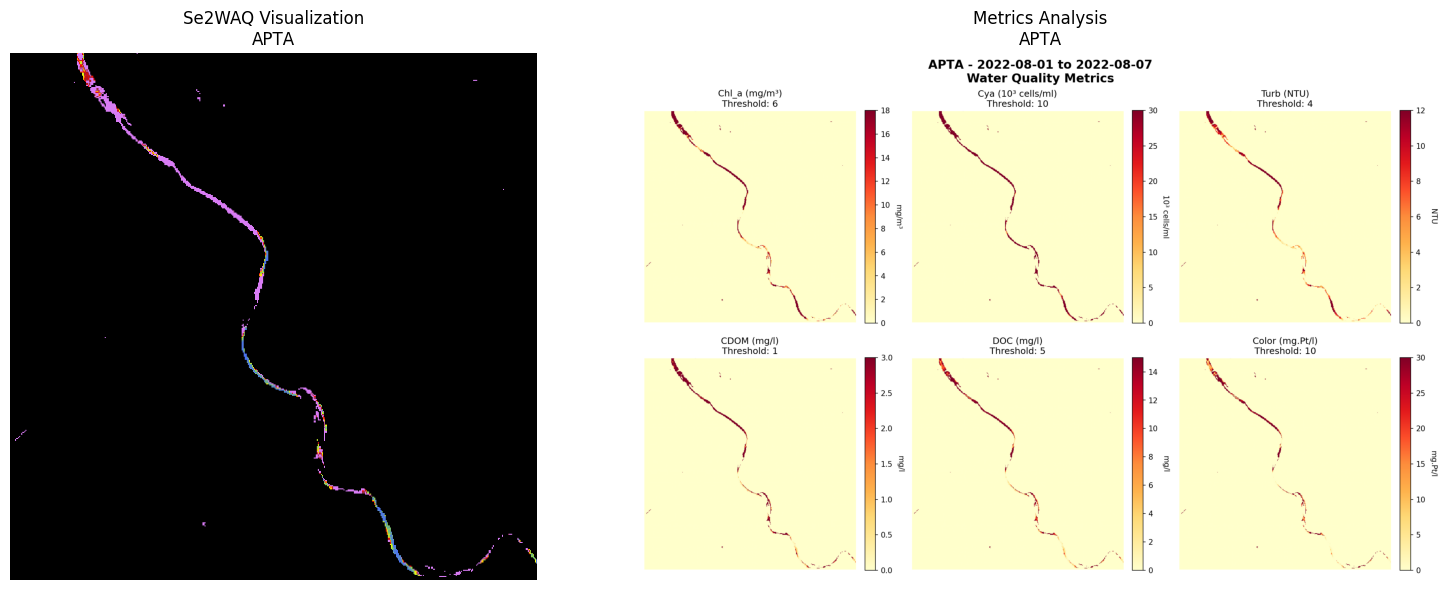

In [15]:
# Display some example results
if len(all_results) > 0:
    print("Example results for the first plant/timeslot:")
    example = all_results[0]
    
    print(f"\nPlant: {example['plant_name']}")
    print(f"Date range: {example['date_from']} to {example['date_to']}")
    print("\nPolluted areas:")
    
    for pollutant, values in example['polluted_areas'].items():
        print(f"  {pollutant}:")
        print(f"    - Area: {values['area_km2']:.6f} km² ({values['area_m2']:.2f} m²)")
        print(f"    - Pixels exceeding threshold: {values['num_pixels']}")
        print(f"    - Threshold: {values['threshold']}")
    
    # Try to display images if available
    try:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Display Se2WAQ visualization
        if os.path.exists(example['visualization_path']):
            viz_img = plt.imread(example['visualization_path'])
            ax1.imshow(viz_img)
            ax1.set_title(f"Se2WAQ Visualization\n{example['plant_name']}", fontsize=12)
            ax1.axis('off')
        
        # Display metrics visualization
        if os.path.exists(example['metrics_viz_path']):
            metrics_img = plt.imread(example['metrics_viz_path'])
            ax2.imshow(metrics_img)
            ax2.set_title(f"Metrics Analysis\n{example['plant_name']}", fontsize=12)
            ax2.axis('off')
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not display images: {e}")
else:
    print("No results to display.")

# ZIPARISMA OLON KAI KATEBASMA TOPIKA


In [16]:
import zipfile
import os

def zip_directory(folder_path, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                print(file)
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, start=folder_path)
                zipf.write(file_path, arcname)

# Example usage:
zip_directory('WASTEWATER_ANALYSIS_20251004_222623', 'wastewater_analysis.zip')


# Initialize OAuth session
print("Authenticating with Sentinel Hub...")
oauth = getauth_token()
print("✓ Authentication successful\n")

# Store all results
all_results = []

# Main processing loop
total_combinations = len(plant_squares) * len(time_slots)
processed = 0

print(f"Processing {len(plant_squares)} plants × {len(time_slots)} timeslots = {total_combinations} combinations\n")
print("="*80)

for plant_idx, (plant_name, square) in enumerate(plant_squares, 1):
    print(f"\n[Plant {plant_idx}/{len(plant_squares)}] {plant_name}")
    print("-"*80)
    
    for slot_idx, slot in enumerate(time_slots, 1):
        processed += 1
        print(f"  Timeslot {slot_idx}/{len(time_slots)}: {slot[0]} to {slot[1]} "
              f"({processed}/{total_combinations} total)")
        
        # 1. Download Se2WAQ visualization
        print("    → Downloading Se2WAQ visualization...")
        viz_path, viz_success = get_se2waq_visualization(oauth, plant_name, square, slot)
        if viz_success:
            print(f"    ✓ Visualization saved")
        
        # 2. Download metric data
        print("    → Downloading metric data...")
        data_path, data_success = get_metric_data(oauth, plant_name, square, slot)
        if data_success:
            print(f"    ✓ Data saved")
        
        # 3. Calculate polluted areas if data available
        if data_success and data_path:
            print("    → Calculating polluted areas...")
            polluted_areas, metric_data = calculate_polluted_areas(data_path)
            
            if polluted_areas:
                print("    ✓ Polluted areas calculated:")
                for pollutant, values in polluted_areas.items():
                    print(f"      - {pollutant}: {values['area_km2']:.4f} km² "
                          f"({values['num_pixels']} pixels above {values['threshold']})")
                
                # 4. Create metrics visualization
                print("    → Creating metrics visualization...")
                metrics_viz_path = os.path.join(
                    METRICS_DIR, 
                    f"{plant_name}_{slot[0]}_metrics.png"
                )
                if create_metrics_visualization(metric_data, plant_name, slot, metrics_viz_path):
                    print("    ✓ Metrics visualization created")
                
                # Store results
                all_results.append({
                    'plant_name': plant_name,
                    'date_from': slot[0],
                    'date_to': slot[1],
                    'visualization_path': viz_path,
                    'data_path': data_path,
                    'metrics_viz_path': metrics_viz_path,
                    'polluted_areas': polluted_areas
                })
        
        print("")

print("="*80)
print(f"\n✓ Processing complete! Processed {processed} combinations.")
print(f"✓ Results saved in: {OUTPUT_DIR}")

To further display and analyse the images further, we need to extract the files. This cell does exactly that and we can see the names of the files in the extracted folder as a result. 

Now, we create a series of plots to display the images we have requested. If we look at them together, we can see how the damaged area has increased over time.------ SOS EINAI OLA APO TI FOTIA STIN ALEKSANDROUPOLI THELEI FTAKSIMO


ncols = 3
nrows = 2
aspect_ratio = 1000 / 1000
subplot_kw = {"xticks": [], "yticks": [], "frame_on": False}

fig, axs = plt.subplots(
    ncols=ncols,
    nrows=nrows,
    figsize=(5 * ncols * aspect_ratio, 5 * nrows),
    subplot_kw=subplot_kw,
)

for idx, slot in enumerate(slots):
    img = plt.imread(f"wastewater_{slot[0]}/default.tif")
    ax = axs[idx // ncols][idx % ncols]
    ax.imshow(img)
    ax.set_title(f"{slot[0]}  -  {slot[1]}", fontsize=10)

plt.tight_layout()

We can visualise the polluted area by plotting these coloured pixels on a simple line time chart as shown below. To calculate the polluted area in square meters, we perform a simple count of the pixels labelled as polluted. From the binary burnMask, we can define a function that calculates the number of pixels that have been classified as polluted regions and multiplies this by the resolution to get the area. The next cell runs this function that takes the mask and the resolution (in meters) as the input and outputs the total area for each time slot.

xlabels = [slot[0] for slot in slots]
x = range(len(slots))
plt.plot(range(len(slots)), burnt_area_arr)
plt.title("Time Series of area burnt in the wildfires.")
plt.xticks(np.arange(0, 5, step=1), xlabels, rotation=30, ha="center")
plt.xlabel("Time slots")
plt.ylabel("Area burnt (in $km^2$)")
plt.show()

This was a brief guide on how to go from viewing satellite imagery in the Copernicus Browser using [Custom Scripts](https://custom-scripts.sentinel-hub.com/custom-scripts/) and requests from the [Requests Builder](https://shapps.dataspace.copernicus.eu/requests-builder/) to preparing a Jupyter Notebook to begin your analysis. From here, you can analyse the pixels, derive statistics and create a workflow that is suitable for your problem. The next step could be to familiarize yourself with various other Sentinel Hub API-s, using [this notebook example](https://github.com/eu-cdse/notebook-samples/blob/main/sentinelhub/introduction_to_SH_APIs.ipynb). You can find more information about the different APIs and various examples in the [documentation](https://documentation.dataspace.copernicus.eu/APIs/SentinelHub.html). Check out the [Custom Scripts Repository](https://custom-scripts.sentinel-hub.com/custom-scripts/) for more examples of evalscripts for a wide range of applications. 